In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##   Questions
### - In which country are people the happiest?
### - Which factor is most closely related to happiness index?
### - Do people have to be rich to be happy?

In [2]:
data = pd.read_csv("C:/Users/j-lan/Desktop/ironhack/week5/mid_bootcamp_project/data/clean/world_happiness_report.csv")
data.head()

,Unnamed: 0,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,0,Afghanistan,South Asia,2022,1.281271,9.523087,0.228217,54.875000,0.368377,0.028539,0.733198,0.205868,0.575512
1,1,Albania,Central and Eastern Europe,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
2,2,Argentina,Latin America and Caribbean,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
3,3,Armenia,Commonwealth of Independent States,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
4,4,Australia,North America and ANZ,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data = data.sort_values(by='life_ladder', ascending=False)

In [5]:
data.reset_index(drop=True, inplace=True)
data

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Finland,Western Europe,2022,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473
1,Israel,Middle East and North Africa,2022,7.662397,10.692273,0.953653,72.849998,0.774947,-0.004873,0.654699,0.582625,0.182902
2,Denmark,Western Europe,2022,7.544965,10.994299,0.970306,71.375000,0.929547,0.224115,0.203140,0.786820,0.205441
3,Iceland,Western Europe,2022,7.448794,10.935112,0.984801,72.074997,0.935669,0.221911,0.692434,0.768394,0.177993
4,Sweden,Western Europe,2022,7.431214,10.912662,0.949338,72.275002,0.939462,0.234011,0.213236,0.750373,0.163276
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Malawi,Sub-Saharan Africa,2022,3.355563,7.295768,0.503325,58.750000,0.743572,0.020474,0.754926,0.535637,0.328764
107,Zimbabwe,Sub-Saharan Africa,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350
108,Sierra Leone,Sub-Saharan Africa,2022,2.560430,7.401131,0.502168,55.299999,0.659596,0.100536,0.861837,0.493701,0.504607
109,Lebanon,Middle East and North Africa,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903


# 1. People in Finland are the happiest in the world

In [6]:
happiest_country = data.loc[0:9]

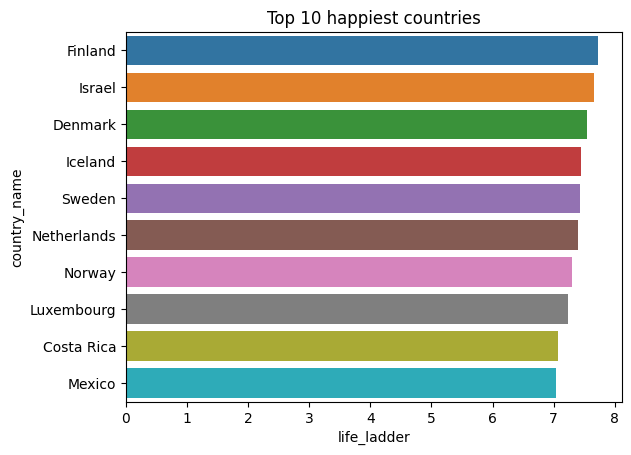

In [7]:
sns.barplot(x='life_ladder', y='country_name', data=happiest_country)
plt.title('Top 10 happiest countries')
plt.show()

## Show all scatterplots about 'life ladder' and 'correlation factors'

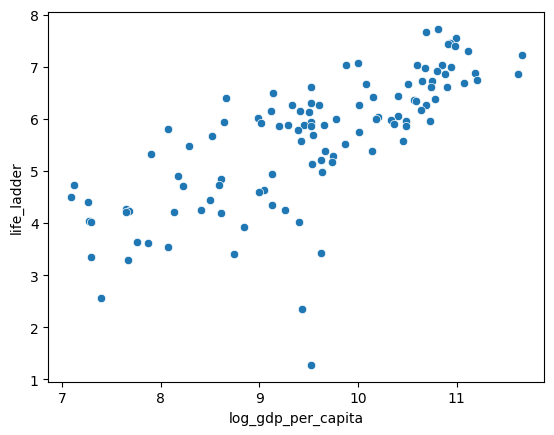

In [8]:
sns.scatterplot(x=data['log_gdp_per_capita'], y=data['life_ladder'])
plt.show()

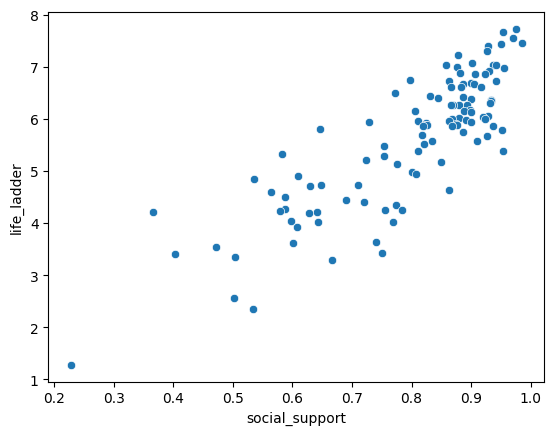

In [9]:
sns.scatterplot(x=data['social_support'], y=data['life_ladder'])
plt.show()
# social_support stands for help from relatives and friends

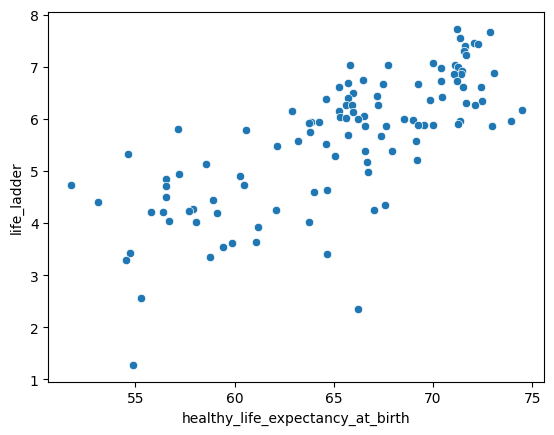

In [10]:
sns.scatterplot(x=data['healthy_life_expectancy_at_birth'], y=data['life_ladder'])
plt.show()

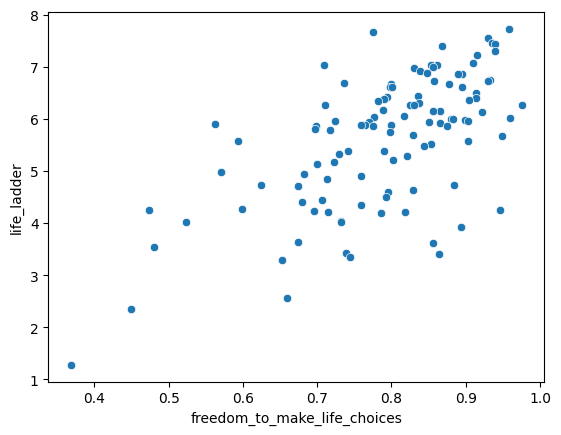

In [11]:
sns.scatterplot(x=data['freedom_to_make_life_choices'], y=data['life_ladder'])
plt.show()

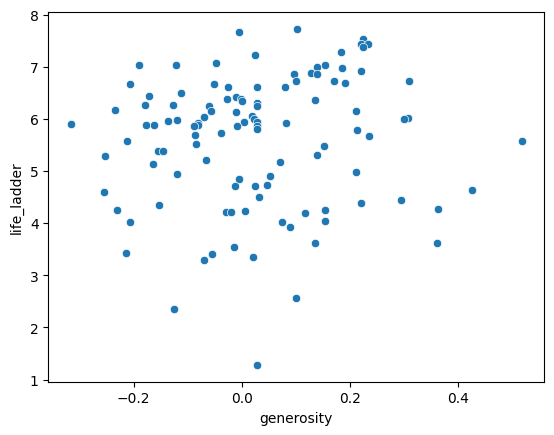

In [12]:
sns.scatterplot(x=data['generosity'], y=data['life_ladder'])
plt.show()
# Have you donated money to a charity in the past month?

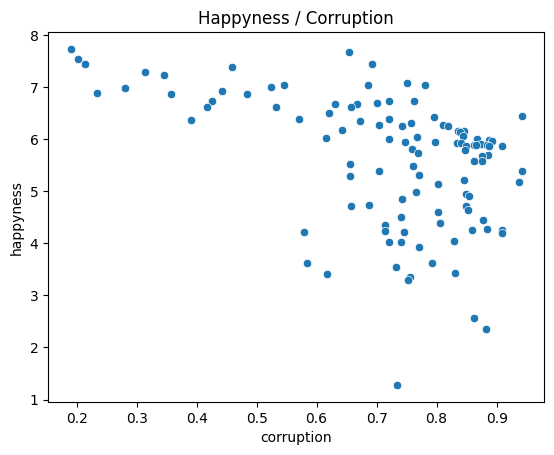

In [21]:
sx = sns.scatterplot(x=data['perceptions_of_corruption'], y=data['life_ladder'])
sx.set(title="Happyness / Corruption", ylabel="happyness", xlabel="corruption")
plt.show()
# Is corruption widespread throughout the government or not?
# Is corruption widespread within businesses or not?

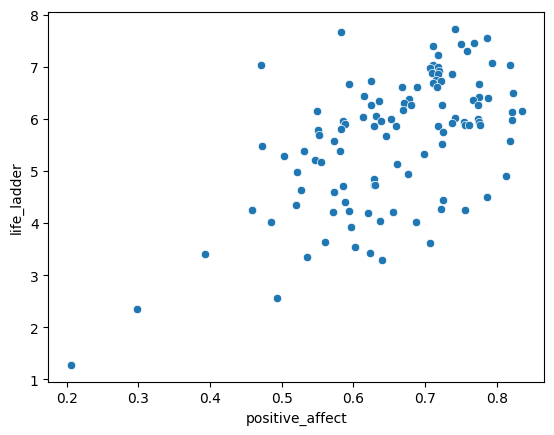

In [14]:
sns.scatterplot(x=data['positive_affect'], y=data['life_ladder'])
plt.show()
# Positive affect is defined as the average of previous-day effects measures for laughter, enjoyment, and interest. 

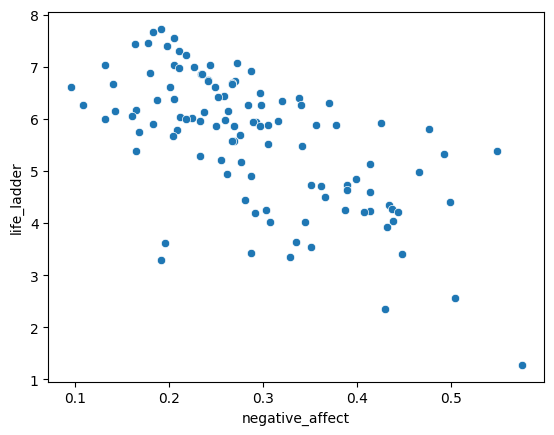

In [15]:
sns.scatterplot(x=data['negative_affect'], y=data['life_ladder'])
plt.show()
# Negative affect is defined as the average of previous-day effects measures for worry, sadness, and anger.

In [16]:
data.columns

Index(['country_name', 'regional_indicator', 'year', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect'],
      dtype='object')

In [17]:
data1 = data.drop(['country_name', 'regional_indicator', 'year'], axis=1)
data1

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473
1,7.662397,10.692273,0.953653,72.849998,0.774947,-0.004873,0.654699,0.582625,0.182902
2,7.544965,10.994299,0.970306,71.375000,0.929547,0.224115,0.203140,0.786820,0.205441
3,7.448794,10.935112,0.984801,72.074997,0.935669,0.221911,0.692434,0.768394,0.177993
4,7.431214,10.912662,0.949338,72.275002,0.939462,0.234011,0.213236,0.750373,0.163276
...,...,...,...,...,...,...,...,...,...
106,3.355563,7.295768,0.503325,58.750000,0.743572,0.020474,0.754926,0.535637,0.328764
107,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350
108,2.560430,7.401131,0.502168,55.299999,0.659596,0.100536,0.861837,0.493701,0.504607
109,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903


In [18]:
correlations_matrix = data1.corr()
correlations_matrix

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
life_ladder,1.000000,0.738085,0.839224,0.738979,0.626354,0.081377,-0.461492,0.581862,-0.632890
log_gdp_per_capita,0.738085,1.000000,0.717165,0.836485,0.344415,-0.072013,-0.443993,0.180028,-0.578965
social_support,0.839224,0.717165,1.000000,0.729494,0.534878,0.055883,-0.247192,0.458705,-0.692629
healthy_life_expectancy_at_birth,0.738979,0.836485,0.729494,1.000000,0.399983,-0.059032,-0.370382,0.235669,-0.529337
freedom_to_make_life_choices,0.626354,0.344415,0.534878,0.399983,1.000000,0.214703,-0.378205,0.601100,-0.440224
generosity,0.081377,-0.072013,0.055883,-0.059032,0.214703,1.000000,-0.255806,0.205223,0.004198
perceptions_of_corruption,-0.461492,-0.443993,-0.247192,-0.370382,-0.378205,-0.255806,1.000000,-0.235293,0.286129
positive_affect,0.581862,0.180028,0.458705,0.235669,0.601100,0.205223,-0.235293,1.000000,-0.380874
negative_affect,-0.632890,-0.578965,-0.692629,-0.529337,-0.440224,0.004198,0.286129,-0.380874,1.000000


## 2. 'social support' is most closely related to 'happiness'.

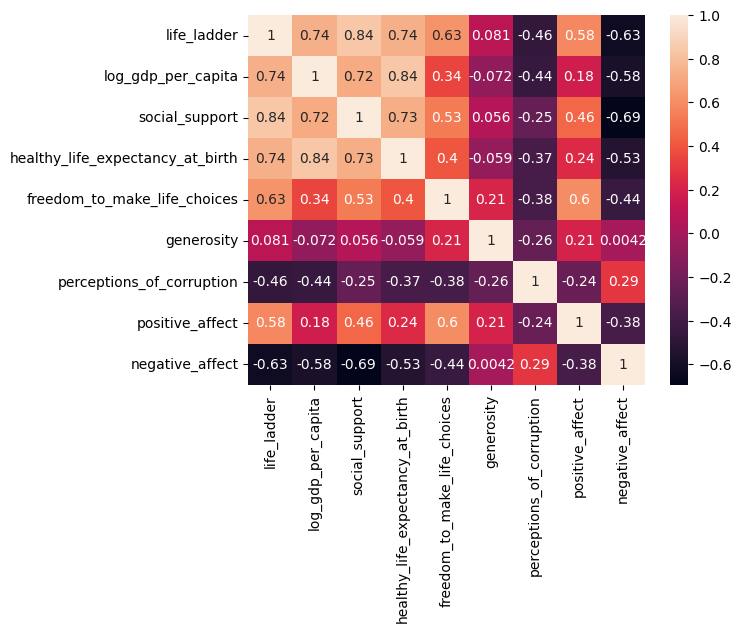

In [19]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### 3. The data shows that money is not the most important factor, nor is it the only factor that leads to happiness.

###  But according to observation and analysis, those rich people at the top and countries with the highest per capita GDP must be happy. 

###  Although GDP per capita does not fully represent income, it represents the economic level and wealth of a country.